In [ ]:
import pandas as pd
import seaborn as sns


In [68]:
results = pd.read_csv('results.csv')

In [55]:
results["model"].unique()

array(['Random Forest', 'Gradient Boosting', 'Logistic Regression',
       'TabPFN', 'TabPFNne', 'default35970_260', 'trees13368_60',
       'trees456_390', 'trees66554_75', 'mlp60400_160', 'mlp71353_400',
       'trees13368_60_no_prepro', 'trees456_390_no_prepro',
       'trees13368_60_no_prepro2', 'trees456_390_no_prepro2',
       'TabPFNno_prepro', 'default35702_250_no_prepro2',
       'trees79428_250_no_prepro2', 'default35702_250', 'trees79428_250',
       'trees13368_15'], dtype=object)

In [65]:
results = pd.read_csv('tabpfn/results_benchmark.csv')
results = results[results["metric"] == "accuracy"]
results["accuracy"] = results["value"]
results = results[results["suite_id"] == "337"]


In [ ]:
pivoted = results.pivot(index=None, columns='metric', values='value')

In [ ]:
results

In [ ]:
pivoted.fillna(method='ffill').columns

In [ ]:
pivoted.fillna(method='ffill').drop_duplicates(subset=["accuracy", "roc_auc"])

In [ ]:
results_337 = results[results["suite_id"] == "337"]
results_334 = results[results["suite_id"] == "334"]
results_cc18 = results[results["suite_id"] == "cc18"]

In [ ]:
results_337.head()

In [ ]:
results[results["model"].isin(["tabpfn_trees13368_60", "tabpfn", "gbt"])]

<Axes: xlabel='task_id', ylabel='accuracy'>

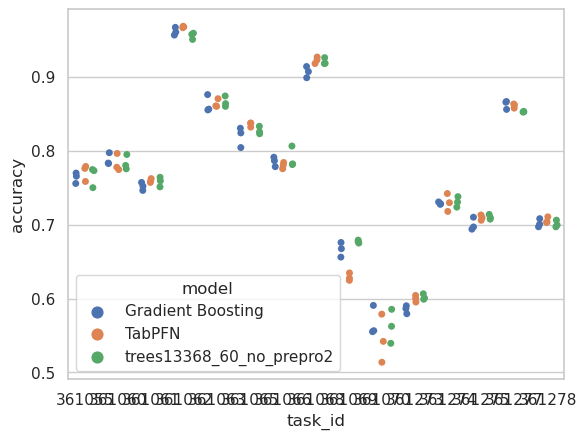

In [70]:
#ax = sns.boxplot(x="task_id", y="value", hue="model", data=results_337[results_337["metric"] == "accuracy"], palette="Set3")
# replace by scatterplot
results["task_id"] = results["task_id"].astype(str)
sns.stripplot(x="task_id", y="accuracy", hue="model", 
              data=results[results["model"].isin(["trees13368_60_no_prepro2", "TabPFN", "Gradient Boosting"])],
              dodge=True)

<Axes: xlabel='task_id', ylabel='accuracy'>

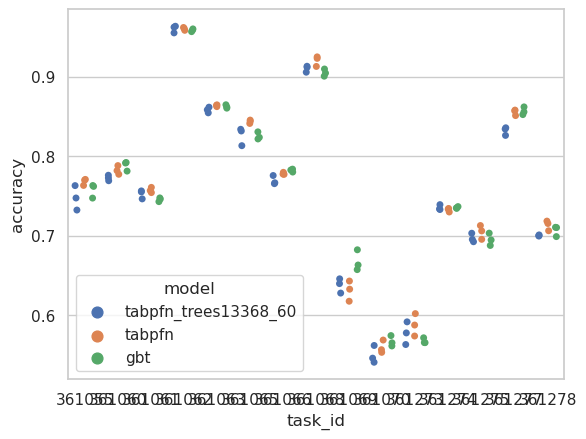

In [67]:
# plot the results
# score in y
# task_id in x
# hue is the model

sns.set(style="whitegrid")
# accuracy

#ax = sns.boxplot(x="task_id", y="value", hue="model", data=results_337[results_337["metric"] == "accuracy"], palette="Set3")
# replace by scatterplot
results["task_id"] = results["task_id"].astype(str)
sns.stripplot(x="task_id", y="accuracy", hue="model", 
              data=results,#[results["model"].isin(["trees13368_60_no_prepro2", "TabPFN", "Gradient Boosting"])],
              dodge=True)

In [ ]:
# Compute mean rank of each model
results = results_337[results_337["metric"] == "accuracy"]
# group by model and task_id, and compute the mean accuracy
mean_acc = results.groupby(['model', 'task_id']).mean()


# sort the resulting dataframe by model and accuracy
sorted_acc = mean_acc.sort_values(['model', 'value'], ascending=[True, False])

# assign ranks to each model based on sorted order of accuracy
sorted_acc['rank'] = sorted_acc.groupby('task_id')['value'].rank(method='dense', ascending=False)


# compute the mean rank for each model
mean_rank = sorted_acc.groupby('model')['rank'].mean()

mean_rank